<a href="https://colab.research.google.com/github/Git053/Limit-Orderbook/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from decimal import Decimal
import os


In [43]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
import pandas as pd 
df = pd.read_csv('/content/drive/MyDrive/data/train.csv', sep=',', parse_dates=["id"])

df.head()


,id,last_price,mid,opened_position_qty,closed_position_qty,transacted_qty,d_open_interest,bid1,bid2,bid3,bid4,bid5,ask1,ask2,ask3,ask4,ask5,bid1vol,bid2vol,bid3vol,bid4vol,bid5vol,ask1vol,ask2vol,ask3vol,ask4vol,ask5vol,y
0,0,3842.4,3842.6,NaN,NaN,103.0,0,3842.4,3842.0,3841.8,3841.0,3840.4,3842.8,3843.4,3843.6,3843.8,3844.0,8,1,6,14,6,6,1,1,10,2,1
1,1,3842.8,3843.4,6.0,49.0,55.0,-43,3843.0,3842.8,3842.4,3842.0,3841.8,3843.8,3844.0,3844.4,3844.6,3844.8,7,6,11,1,6,1,4,4,1,13,0
2,2,3844.0,3844.3,7.0,77.0,84.0,-69,3843.8,3843.6,3843.2,3843.0,3842.8,3844.8,3845.0,3845.4,3845.6,3845.8,3,1,4,21,12,1,16,10,4,9,0
3,3,3843.8,3843.4,3.0,34.0,37.0,-30,3843.0,3842.8,3842.4,3842.0,3841.4,3843.8,3844.0,3844.4,3844.6,3844.8,10,13,12,2,4,2,7,1,2,11,1
4,4,3843.2,3843.1,3.0,38.0,41.0,-35,3842.8,3842.4,3842.0,3841.8,3841.4,3843.4,3844.0,3844.6,3844.8,3845.0,14,12,2,2,4,1,3,1,11,15,1


(array([1.2200e+03, 4.0880e+03, 7.2500e+03, 1.1822e+04, 2.2356e+04,
        2.6007e+04, 7.8410e+03, 1.7000e+01, 2.6500e+03, 8.1190e+03,
        5.5170e+03, 9.1470e+03, 1.5662e+04, 3.2597e+04, 4.2479e+04,
        4.1335e+04, 3.0420e+03, 2.8600e+02, 0.0000e+00, 2.0000e+00,
        5.0200e+02, 9.7700e+02, 5.0270e+03, 9.6280e+03, 6.1530e+03,
        7.7480e+03, 1.0513e+04, 1.1037e+04, 1.4459e+04, 1.8838e+04,
        1.7860e+04, 1.8008e+04, 1.2549e+04, 1.6781e+04, 1.5614e+04,
        1.6394e+04, 1.1965e+04, 2.3006e+04, 2.5302e+04, 2.0009e+04,
        2.6126e+04, 1.1508e+04, 5.1190e+03, 3.3840e+03, 6.7200e+03,
        1.5072e+04, 1.1974e+04, 4.5680e+03, 3.3140e+03, 7.8800e+02]),
 array([3812.1  , 3818.178, 3824.256, 3830.334, 3836.412, 3842.49 ,
        3848.568, 3854.646, 3860.724, 3866.802, 3872.88 , 3878.958,
        3885.036, 3891.114, 3897.192, 3903.27 , 3909.348, 3915.426,
        3921.504, 3927.582, 3933.66 , 3939.738, 3945.816, 3951.894,
        3957.972, 3964.05 , 3970.128, 3976.206

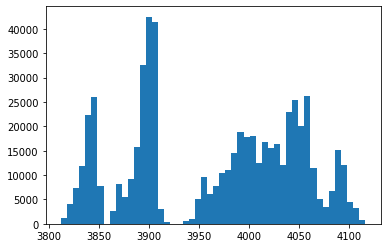

In [45]:
plt.hist(df.mid, bins=50)

In [46]:
df['total_bid_amount']= (df.bid1vol+df.bid2vol+df.bid3vol+df.bid4vol+df.bid5vol)

In [47]:
df['total_ask_amount']= (df.ask1vol+df.ask2vol+df.ask3vol+df.ask4vol+df.ask5vol)
df['imbalance'] = (df.total_bid_amount-df.total_ask_amount) / (df.total_bid_amount+df.total_ask_amount)


Text(0.5, 1.0, 'orderbook imbalance distribution')

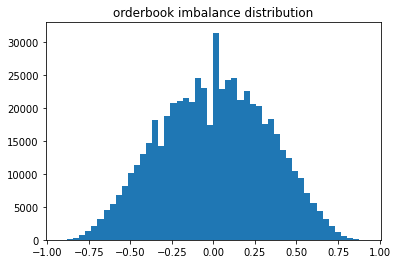

In [48]:
plt.hist(df.imbalance, bins=50)
plt.title('orderbook imbalance distribution')

In [49]:
df.imbalance.mean(), df.imbalance.median()

(0.005478806688731975, 0.0)

In [50]:
df.head()

,id,last_price,mid,opened_position_qty,closed_position_qty,transacted_qty,d_open_interest,bid1,bid2,bid3,bid4,bid5,ask1,ask2,ask3,ask4,ask5,bid1vol,bid2vol,bid3vol,bid4vol,bid5vol,ask1vol,ask2vol,ask3vol,ask4vol,ask5vol,y,total_bid_amount,total_ask_amount,imbalance
0,0,3842.4,3842.6,NaN,NaN,103.0,0,3842.4,3842.0,3841.8,3841.0,3840.4,3842.8,3843.4,3843.6,3843.8,3844.0,8,1,6,14,6,6,1,1,10,2,1,35,20,0.272727
1,1,3842.8,3843.4,6.0,49.0,55.0,-43,3843.0,3842.8,3842.4,3842.0,3841.8,3843.8,3844.0,3844.4,3844.6,3844.8,7,6,11,1,6,1,4,4,1,13,0,31,23,0.148148
2,2,3844.0,3844.3,7.0,77.0,84.0,-69,3843.8,3843.6,3843.2,3843.0,3842.8,3844.8,3845.0,3845.4,3845.6,3845.8,3,1,4,21,12,1,16,10,4,9,0,41,40,0.012346
3,3,3843.8,3843.4,3.0,34.0,37.0,-30,3843.0,3842.8,3842.4,3842.0,3841.4,3843.8,3844.0,3844.4,3844.6,3844.8,10,13,12,2,4,2,7,1,2,11,1,41,23,0.281250
4,4,3843.2,3843.1,3.0,38.0,41.0,-35,3842.8,3842.4,3842.0,3841.8,3841.4,3843.4,3844.0,3844.6,3844.8,3845.0,14,12,2,2,4,1,3,1,11,15,1,34,31,0.046154


In [51]:
df2 = df[['mid', 'imbalance']]
df2

,mid,imbalance
0,3842.6,0.272727
1,3843.4,0.148148
2,3844.3,0.012346
3,3843.4,0.281250
4,3843.1,0.046154
...,...,...
592375,4110.3,-0.487179
592376,4110.5,-0.265306
592377,4110.5,-0.265306
592378,4110.5,-0.265306


### ***mid price & imbalance distribution ***

(0.0, 10000.0)

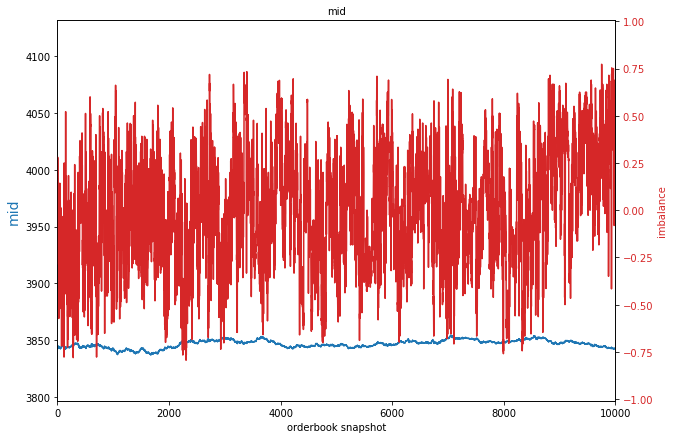

In [52]:
fig, ax1 = plt.subplots(figsize=(10,7))
color_1 = 'tab:blue'
ax1.set_title('mid', fontsize=10)
ax1.set_xlabel('orderbook snapshot')
ax1.set_ylabel('mid', fontsize=14, color=color_1)
ax1.plot(df2.index, df2.mid, color=color_1)

ax2 = ax1.twinx()
color_2 = 'tab:red'
ax2.set_ylabel('imbalance', fontsize=10, color=color_2)
ax2.plot(df2.index, df2.imbalance, color=color_2)
ax2.tick_params(axis='y', labelcolor=color_2)

plt.xlim([0,10000])


In [66]:
df2.corr()

,mid,imbalance
mid,1.00000,-0.01632
imbalance,-0.01632,1.00000


In [75]:
volumes = np.array([1000, 10000, 50000, 100000, 1000000])
print(volumes)
ask_volume_median = df.total_ask_amount.median() * df.mid.mean()
bid_volume_median = df.total_bid_amount.median() * df.mid.mean()
print(f'median ask and bid volume in orderbook: {ask_volume_median: .0f}, {bid_volume_median: .0f}. ')

[   1000   10000   50000  100000 1000000]
median ask and bid volume in orderbook:  87244,  87244. 
